In [1]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data extraction

## Download a publicly available dataset

In [2]:
# Data are from data.seattle.gov.(https://data.seattle.gov/Public-Safety/Crime-Data/4fs7-3vj5)
fileName = "Seattle_Crime_Data.csv"
seaCrimeData = pd.read_csv(fileName)

# You can also read the data from url by uncomment the lines below
# dataUrl = "https://data.seattle.gov/api/views/4fs7-3vj5/rows.csv?accessType=DOWNLOAD"
# seaCrimeData = pd.read_csv(dataUrl)

## Describe the dataset

Summary: This data represents crime reported to the Seattle Police Department (SPD). Each row contains the record of a unique event where at least one criminal offense was reported by a member of the community or detected by an officer in the field.

Date Created: April 19, 2018
Date Updated: December 5, 2019

Dataset contains 524k rows and 11 columns, each row is a unique crime report record.

Columns in this Dataset:

1. Report Number

2. Occurred Date

3. Occurred Time

4. Reported Date

5. Reported Time

6. Crime Subcategory

7. Primary Offense Description

8. Precinct

9. Sector

10. Beat

11. Neighborhood

In [3]:
seaCrimeData.shape

(523591, 11)

In [4]:
#Table preview
seaCrimeData.head(10)

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,20080000465209,12/13/1908,2114.0,12/13/2008,2114.0,DUI,DUI-LIQUOR,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
1,20100000202011,06/15/1964,0.0,06/15/2010,1031.0,FAMILY OFFENSE-NONVIOLENT,CHILD-OTHER,WEST,Q,Q2,QUEEN ANNE
2,2012000023437,01/01/1973,0.0,01/25/2012,1048.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,NORTH,N,N2,NORTHGATE
3,20130000327785,06/01/1974,0.0,09/09/2013,1117.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN
4,20160000289384,01/01/1975,0.0,08/11/2016,1054.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN
5,1975000079415,12/16/1975,900.0,12/16/1975,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK
6,1976000069169,01/01/1976,1.0,01/31/1976,2359.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,UNKNOWN,NaN,NaN,UNKNOWN
7,20170000474905,07/01/1976,800.0,12/27/2017,1519.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,UNKNOWN,NaN,NaN,UNKNOWN
8,20180000183590,01/01/1977,0.0,05/22/2018,1328.0,RAPE,SEXOFF-SODOMY,UNKNOWN,NaN,NaN,UNKNOWN
9,20090000300201,01/01/1978,1.0,08/25/2009,1016.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,SOUTHWEST,W,W1,ALKI


## Describe what question you intend to answer with the dataset

Through this project, I would like to answer the following questions with the dataset:

1. What is the top crime categories in Seattle?
2. Which neighborhood in Seattle has the most crime cases?
3. What day of the week has the most crime cases in Seattle?
4. Can we predict Crime Category given other facts(occured time, neighborhood) of the dataset?

# Data cleanup

In [5]:
# Delete data where Neighborhood is 'UNKNOWN'
unknownNeighborhoodIndex = seaCrimeData[ seaCrimeData['Neighborhood'] == "UNKNOWN" ].index
seaCrimeData.drop(unknownNeighborhoodIndex , inplace=True)

In [6]:
# Update Occurred Date column to use datatime format 'yyyy-mm--dd'
# Create new column Day Of Week based on Occurred Date
seaCrimeData['Occurred Date'] = pd.to_datetime(seaCrimeData['Occurred Date'])
seaCrimeData['Day Of Week'] = seaCrimeData['Occurred Date'].dt.day_name()

In [7]:
# Do some test after clean up the colums above.
seaCrimeData.head(5)

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Day Of Week
0,20080000465209,1908-12-13,2114.0,12/13/2008,2114.0,DUI,DUI-LIQUOR,EAST,G,G2,CENTRAL AREA/SQUIRE PARK,Sunday
1,20100000202011,1964-06-15,0.0,06/15/2010,1031.0,FAMILY OFFENSE-NONVIOLENT,CHILD-OTHER,WEST,Q,Q2,QUEEN ANNE,Monday
2,2012000023437,1973-01-01,0.0,01/25/2012,1048.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,NORTH,N,N2,NORTHGATE,Monday
5,1975000079415,1975-12-16,900.0,12/16/1975,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK,Tuesday
9,20090000300201,1978-01-01,1.0,08/25/2009,1016.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,SOUTHWEST,W,W1,ALKI,Sunday


# Data visualization

## Crime count by subcategory

In [8]:
crimeCategory = seaCrimeData[['Crime Subcategory']]

In [9]:
crimeCategoryCount = pd.DataFrame(crimeCategory.groupby('Crime Subcategory').size().sort_values(ascending=False).rename('Counts').reset_index())

In [10]:
# Top 10 Crime Subcategory in Seattle
crimeCategoryCount.head(10)

,Crime Subcategory,Counts
0,CAR PROWL,147593
1,THEFT-ALL OTHER,53997
2,THEFT-SHOPLIFT,48607
3,BURGLARY-RESIDENTIAL,46772
4,MOTOR VEHICLE THEFT,43444
5,BURGLARY-COMMERCIAL,23499
6,THEFT-BUILDING,21394
7,TRESPASS,17661
8,NARCOTIC,16924
9,AGGRAVATED ASSAULT,15483


In [11]:
crimeCategoryCount.shape

(30, 2)

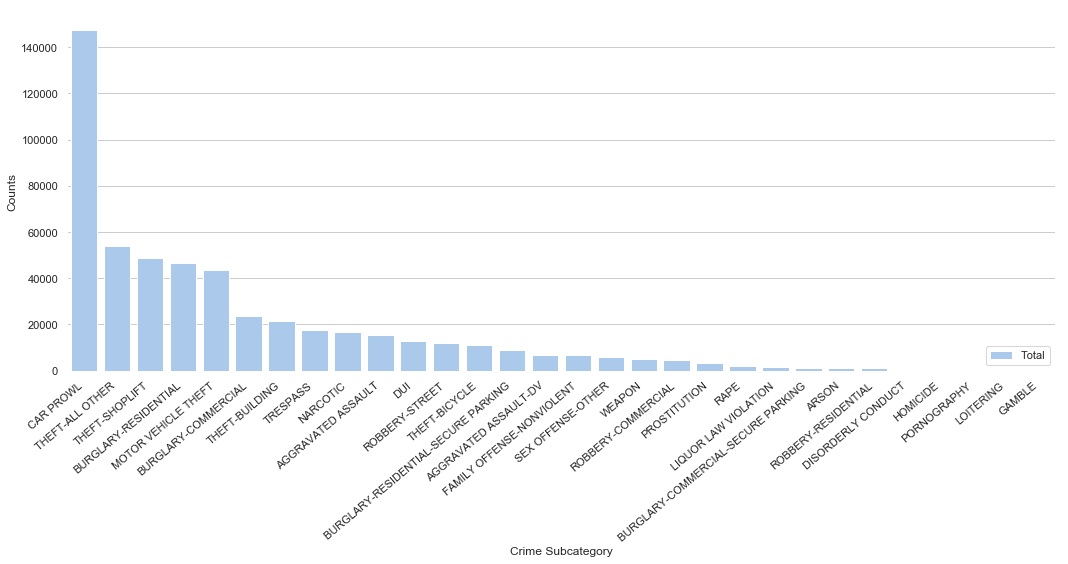

In [12]:
## Crime Subcategory Visualization
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Crime Subcategory", y="Counts", data=crimeCategoryCount.iloc[:30, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Counts",xlabel="Crime Subcategory")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

## Trend
The most crime cases in Seattle Car Prowl, follwed by many theft crimes.

## Crime Count by Neighborhood

In [13]:
crimeNeighborhood = seaCrimeData[['Neighborhood']]
crimeNeighborhoodCount = pd.DataFrame(crimeNeighborhood.groupby('Neighborhood').size().sort_values(ascending=False).rename('Counts').reset_index())

In [14]:
# Top 10 Crime Neighborhood in Seattle
crimeNeighborhoodCount.head(10)

,Neighborhood,Counts
0,DOWNTOWN COMMERCIAL,48942
1,NORTHGATE,30820
2,CAPITOL HILL,30735
3,QUEEN ANNE,27402
4,SLU/CASCADE,23343
5,UNIVERSITY,20868
6,ROOSEVELT/RAVENNA,19451
7,BALLARD SOUTH,15611
8,CHINATOWN/INTERNATIONAL DISTRICT,15401
9,BELLTOWN,15370


In [15]:
crimeNeighborhoodCount.shape

(58, 2)

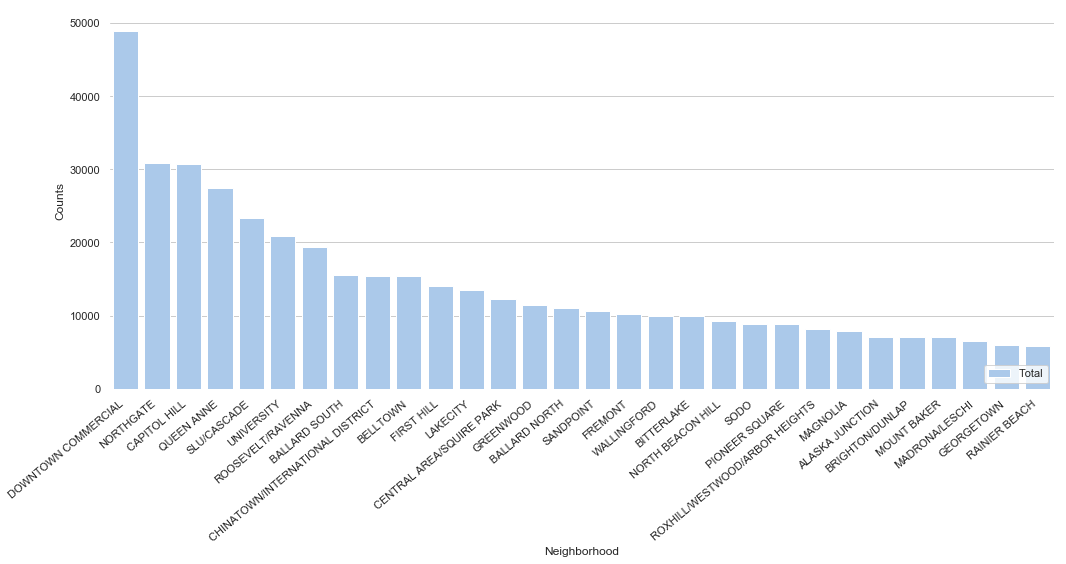

In [16]:
## Crime Visualization by Neighborhood(Top 30)
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Neighborhood", y="Counts", data=crimeNeighborhoodCount.iloc[:30, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Counts",xlabel="Neighborhood")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

## Trend
Downtown, Northgate, Capitol Hill, Queen Anne, SLU are the top 5 crime neighborhood. They are aslo neighborhood top population-density.

## Crime Count by Time Range

In [17]:
crimeWeekOfDay = seaCrimeData[['Day Of Week']]
crimeWeekOfDayCount = pd.DataFrame(crimeWeekOfDay.groupby('Day Of Week').size().sort_values(ascending=False).rename('Counts').reset_index())

In [18]:
crimeWeekOfDayCount

,Day Of Week,Counts
0,Friday,80795
1,Saturday,76396
2,Thursday,74353
3,Wednesday,73829
4,Tuesday,73385
5,Monday,72857
6,Sunday,68610


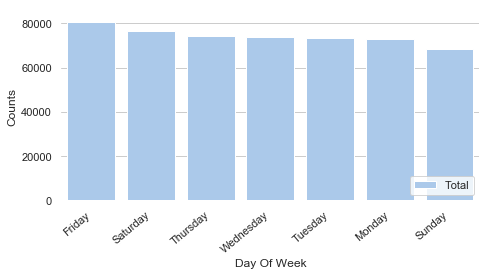

In [20]:
## Crime Visualization by Neighborhood(Top 30)
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(7, 4))

sns.set_color_codes("pastel")
sns.barplot(x="Day Of Week", y="Counts", data=crimeWeekOfDayCount.iloc[:7, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Counts",xlabel="Day Of Week")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

# Descriptive/Predictive analytics

## Using C-Support Vector Classification to predict Crime Category

In [21]:
# C-Support Vector Classification
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
import numpy as np

In [23]:
# Compose dataset
data = seaCrimeData[['Occurred Time', 'Neighborhood', 'Day Of Week','Precinct', 'Sector', 'Crime Subcategory']]

In [24]:
#encode Strings
encoder = preprocessing.LabelEncoder()
data['Crime Subcategory'] = encoder.fit_transform(data['Crime Subcategory'])
data['Neighborhood'] = encoder.fit_transform(data['Neighborhood'])
data['Sector'] = encoder.fit_transform(data['Sector'])
data['Precinct'] = encoder.fit_transform(data['Precinct'])
data['Day Of Week'] = encoder.fit_transform(data['Day Of Week'])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [25]:
##Use first 100,000 rows of data. It will take much longer to train the full dataset
data = data[:100000]

In [26]:
## Split training and validation set (75%,15%)
training, validation = train_test_split(data, train_size=.75)

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [27]:
# Define training features
features = list(training.columns)[:-1]

In [28]:
svc = SVC()
svc.fit(training[features], training['Crime Subcategory'])

/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
svc.score(validation[features], validation['Crime Subcategory'])

0.32464

# Prediction Analysis
The prediction on validation set has 32% accuracy, which is not very promising. From here, I can conclude that by given Neighborhood, Sector, Occured Time, Precinct, Day of Week, we can't predict the Crime Category, or we can say that they are not related. (Maybe there will be a better result if we add more data to the traning set)